***
***
***

<br><h2>Unsupervised Learning Project</h2>
<h4>Windows or Mac? | Machine Learning Course</h4>
<br>
Team 1: <br>
Abdulrahim Bishar, Justyna Dmowska, Josh McCormick, Diego Antonio Giménez De Stefano, Piya Thavornwong, Peihua Tsai 
<br>

Cohort: Valencia<br><br><br>

***
***
***

<br><h2>Purpose of the analysis</h2>
<h4>There are different aspects of consumer buying behavior, while preparing to buy a new computer: Windows or Mac. Microsoft has decided to approach this analysis from the perspective of the Big Five personality traits as well as the Hult DNA. </h4>
<br>
The purpose of this analysis is to use unsupervised learning to gain information and see patterns related to personality traits and how they affect laptop manufacturer preference, if they do at all. This information will be used to derive insights for Microsoft, both on their current customers and any potential customers. The data being used came from a survey containing questions which can be used to determine personality type, more specifically looking at <br>
<a href="https://psychcentral.com/lib/the-big-five-personality-traits/">'The Big Five'</a>, as well as questions about the 
<a href="https://www.hult.edu/blog/why-every-leader-needs-growth-mindset/">Hult DNA</a> and demographic information.
<br><br><br>

<br><h2>Domain knowledge</h2>
<br>

Before beginning to analyze the survey responses, we conducted some domain research to get a better understanding of the data we had. This research was also used to derive hypotheses. Some highlights from our research can be found below.
<br>

#### <a href="https://pages.uoregon.edu/sanjay/pubs/bigfive.pdf">Sanjay & John</a> (1999)

The above journal provides in depth analysis of 'The Big Five' personality traits. Sanjay would <a href="https://pages.uoregon.edu/sanjay/bigfive.html">go on to summarize the traits</a> as follows:
- **Extraversion**. The broad dimension of Extraversion encompasses such more specific traits as talkative, energetic, and assertive.
- **Agreeableness**. Includes traits like sympathetic, kind, and affectionate.
- **Conscientiousness**. Includes traits like organized, thorough, and planful.
- **Neuroticism** (sometimes reversed and called Emotional Stability). Includes traits like tense, moody, and anxious.
- **Openness to Experience** (sometimes called Intellect or intellect/Imagination). Includes traits like having wide interests, and being imaginative and insightful.


#### <a href="https://www.researchgate.net/publication/259540094_I'm_a_Mac_versus_I'm_a_PC_Personality_Differences_between_Mac_and_PC_Users_in_a_College_Sample">Nemid & Pastva</a> (2013)

 - Big Five personality traits did not differentiate between Mac and PC owners. Students overall rated Macs higher on various product attributes (attractive style, cool, youthful, and exciting) and PCs higher on reasonable price and good for gaming. 
 - PC owners placed greater importance on cost as a determinant of brand choice, whereas Mac owners placed greater emphasis on style.  
 - Personality traits may have more nuanced effects on brand choices, as shown by relationships between Neuroticism and greater importance placed on cost and lesser importance placed on ease of use. 
     - **Personality Traits are more important in the brand choice!**
     - More neuroticism, more importance in cost and less importance in ease of use     
- Openness to Experience was associated with greater importance placed on reliability and lesser importance placed on style.
    - **More openness to experience, more importance in reliability and less importance in style**
  


#### <a href="https://www.pcworld.com/article/141473/article.html">PC World</a>

A study carried out by Mindset Media for PC World found the following:

- People who purchase Macs fall into what the branding company calls the "Openness 5" personality category -- which means they are more liberal, less modest and more assured of their own superiority than the population at large.
-  People from Openness 5 seek rich, varied and novel experiences, according to the company, and believe that imagination and intellectual curiosity are as important to life as more rational or pragmatic endeavors.
<br><br><br>

<br><h2>Data preparation</h2>
<br>
This part includes:
- loading libraries and dataset
- defining helping functions, used in the further analysis
- exploring the variables and gathering first hypothesis about them
- dividing data into variables related to Big Five personality and Hult DNA
- grouping survey answers, based on the domain knowledge and research
<br><br><br>

In [2]:
########################################
# Importing packages
########################################
import pandas                as pd                          # data science essentials
import matplotlib.pyplot     as plt                         # fundamental data visualization
import seaborn               as sns                         # enhanced visualizations
from sklearn.preprocessing   import StandardScaler          # standard scaler
from sklearn.decomposition   import PCA                     # pca
from scipy.cluster.hierarchy import dendrogram, linkage     # dendrograms
from sklearn.cluster         import KMeans                  # k-means clustering

sns.set()

In [3]:
########################################
# Reading Data
########################################
my_df = pd.read_excel('Survey_Data_Final_Exam.xlsx')

<br><h4>Defining helping functions</h4>
<br>
In this step, we have defined 3 functions that will be used in the further analysis. 
<br>
- columnNamer renames columns depending if they are related to the Big 5 or to Hult DNA
- inertia_plot shows visual representation of the clusters created in kMeans unsupervised model, in order to choose optimal number of such clusters
- scree_plot plots all PCA components against their explained variance in the dataset, in order to chose reasonable number of such a features
<br><br><br>

In [39]:
def columnNamer(cols, isBigFive, isHultDna):
    '''
    This function renames columns depending if they are from the big 5 or 
    from Hult DNA. The format of the columns is <B5 or DNA>_Q<n>__<NAME_OF_COLUMN>.
    
    ----------------------
    Params
    ----------------------
    
    cols: Column name list.
    isBigFive: Boolean. If True, function will assume that all the columns are from the big five. 
    isHuldDNA: Boolean. If True, function will assume that all the columns are from the hult dna.
    
    '''
    

    cols = cols.str.lower()
    cols = cols.str.replace(' ', '_') # Fill spaces with underscore 
    cols = cols.str.replace("'", '') # Remove quotes from questions


    if isBigFive == True:
        _cols =  []
        
        for i in range(len(cols)):
#             _cols.append(f'B5_Q{i+1}__{cols[i]}')
            _cols.append(f'B5__{cols[i]}')
        return _cols

    elif isHultDna == True: 

        _cols =  []

        for i in range(len(cols)):
            _cols.append(f'DNA_Q{i+1}__{cols[i]}')
        return _cols 

    else:
        print('Call Manwe, Morgoth introduced a bug in this function')
        
        
def inertia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

<br><h4>Data exploration</h4>
<br>

- Missing values: <br>
There is only 1 missing value in the ethnicity column. It will be addressed in the cleaning of the demographic data. 
<br>
- Consistency of the categorical data: <br>
There is one observation with the current and future laptop 'MAC', while in other observations, it is called 'Macbook'. For consistency, 'MAC' will be changed to 'Macbook' in both columns. 
<br>

Value counts on the 'What laptop do you currently have?' column, after above transformation, shows rather equal representation of Windows and Macbook users in the sample (with few more customers using Macbook).
<br>

In the next step, we have created separate dataframes with variables related to Big5 personalities and Hult DNA.
<br><br><br>

In [5]:
# Changing the answer 'Mac' to 'Macbook' to have more coherent data
my_df['What laptop do you currently have?'] =  my_df['What laptop do you currently have?'].replace('MAC', 'Macbook')
my_df['What laptop would you buy in next assuming if all laptops cost the same?'] =  my_df['What laptop would you buy in next assuming if all laptops cost the same?'].replace('MAC', 'Macbook')

In [6]:
# Calling value counts on the laptops that consumers currently have to see initial distribution
my_df.loc[:,'What laptop do you currently have?'].value_counts()

Macbook           200
Windows laptop    192
Name: What laptop do you currently have?, dtype: int64

<br><h4>Demographic variables</h4>
<br><br><br>

In [7]:
# Renaming Demographic Data

# Creating a dictionary
columns_to_change = dict(zip([
        'What laptop do you currently have?',
        'What laptop would you buy in next assuming if all laptops cost the same?',
        'What program are you in?', 
        'What is your age?', 
        'Gender',
        'What is your nationality? ', 
        'What is your ethnicity?'], 
        
       ['Current laptop', 
        'Next laptop', 
        'Program', 
        'Age', 
        'Gender',
        'Nationality', 
        'Ethnicity'
    ]
))

my_df.rename(columns_to_change,
                   axis='columns',inplace=True)

# Renaming Big 5 Data 
# Separated Big 5 Data set
big_five = my_df.iloc[:, 1:51]  # Subset big five-related columns

# Change Column Names
big_five.columns = columnNamer(big_five.columns,
                               isBigFive=True,
                               isHultDna=False)


# Creating demographic Variables 
demographics = my_df.loc[:,  ['Current laptop', 
        'Next laptop', 
        'Program', 
        'Age', 
        'Gender',
        'Nationality', 
        'Ethnicity'                     
    ]]

In [8]:
placeholder_lst = []

for age in my_df['Age']:
    
    if age <= 20:
        age_range = '<20'
    
    elif age > 20 and age <= 25:
        age_range = '20-25'
    
    elif age > 25 and age <= 30:
        age_range = '26-30'
        
    elif age > 30 and age <= 35:
        age_range = '31-35'
    
    elif age > 36 and age <= 40:
        age_range = '36-40'
        
    elif age > 40:
        age_range = '>40'
        
    placeholder_lst.append(age_range)
    
my_df['age_range'] = placeholder_lst

In [9]:
placeholder_lst = []

# create a list for nationality change
nation_change = [[['china'],'chinese'],
                 [['peru'], 'peruvian'],
                 [['mexico'], 'mexican'],
                 [['usa'], 'american'],
                 [['russia'], 'russian'],
                 [['ecuador'], 'ecuadorian'],
                 [['brazil'], 'brazilian'],
                 [['nigeria'], 'nigerian'],
                 [['korea','republicofkorea','southkorea'],'korean'],
                 [['spain'],'spanish'],
                 [['indonesia'],'indonesian'],
                 [['germany'],'german'],
                 [['colombia'], 'colombian'],
                 [['taiwan', 'taiwan(roc)'], 'taiwanese'],
                 [['japan'], 'japanese'],
                 [['canada'], 'canadian'],
                 [['philippines'], 'filipino'],
                 [['thailand'], 'thai'],
                 [['india'], 'indian'],
                 [['czechrepublic'], 'czech'],
                 [['belgium'], 'belgian'],
                 [['english'], 'british'],
                 [['ghana'], 'ghanaian'],
                 [['.', 'hispanic'], 'prefernottoanswer'],
                 [['italianandspanish', 'german/american', 'french/brazilian', 'british,indian', 'caribbean-american'], 'multi-ethnic'],
                 [['costarica'], 'costarrican'],
                 [['congolese(drcongo)'], 'congolese'],
                 [['venezuela'],'venezuelan'],
                 [['dominicanrepublic'],'dominican']
                
                ]

# create a for loop
for nationality in my_df['Nationality']:
    
    # remove " " and "."
    nationality = nationality.lower().replace(" ","").replace(".","")
    
    # create a loop
    for old_nat, new_nat in nation_change:
    
        # create if statement to check if nationality is wrong
        if nationality in old_nat:
            nationality = new_nat
    
    # append the correct nationality to a list
    placeholder_lst.append(nationality)

# create a new column
my_df['Nationality2'] = placeholder_lst

In [10]:
# create a placeholder list
placeholder_lst = []

# create a for loop
for nationality in my_df['Nationality2']:
    
    # check if nationality is in Asia
    if nationality in ['indian','chinese','taiwanese','filipino','korean',
                       'thai','indonesian','vietnamese','japanese','palestinian',
                       'kyrgyz','pakistani','bangladeshi','iran','malaysia']:
        nationality = 'Asian'
    
    # check if nationality is in Europe
    elif nationality in ['german','russian','italian','spanish','norwegian',
                         'turkish','belgian','czech','british','swiss',
                         'ukrainian','portuguese','belarus','dutch','poland',
                         'armenia','dutch']:
        nationality = 'European'
    
    # check if nationality is in North America
    elif nationality in ['mexican','american','canadian','dominican','costarrican',
                         'panama','guatemalan','elsalvador','honduran']:
        nationality = 'North American'
    
    # check if nationality is in South America
    elif nationality in ['peruvian','colombian','brazilian','ecuadorian',
                         'venezuelan']:
        nationality = 'South American'
    
    # check if nationality is in Africa
    elif nationality in ['nigerian','kenyan','congolese','ghanaian','ugandan',
                         'mauritius','southafrican','cameroon']:
        nationality = 'Africa'
    
    # check if nationality is multi-ethnic
    elif nationality == 'multi-ethnic':
        nationality = 'multi-ethnic'
    
    # put 'prefernottoanswer' for the remaining
    else: 
        nationality = 'prefernottoanswer'
    
    # append the new nationality group to a list
    placeholder_lst.append(nationality)

# create a new column
my_df['Nationality_continent'] = placeholder_lst

<br><h4>Hypotheses about laptop users</h4>
<br>

Based on the external research, presented earlier, we have created some initial hypotheses about Mac and Windows users:
<br>

- Mac users will have more opennes to new adventures based on the PC World research
- Mac users are more extroverted than windows users. <a href="https://mashable.com/2011/04/23/mac-vs-pc-infographic/">This infographic</a> created by Hunch states that Windows users are 26% more likely to prefer fitting in with others, while Mac users are 50% more likely to say they frequently throw parties.
- Windows users will be more conscientious than Mac users. <a href="https://www.neosperience.com/blog/the-new-marketing-is-people-centric-know-your-customer-personality/">It has been said</a> that when purchasing, conscientious customers 'look for the utilitarian, functional, task-related, and rational value of shopping'. 
<br>

In the next part of this work, we will create models and derive insights, which will be tested against those initial hypotheses.
<br><br><br>

<br><h4>Determining Customer Types</h4>
<br>

The initial plan was to split each respondent in to one of 4 customer types; Loyal Windows, Loyal Macbook, Windows Deserter and Macbook Deserter. However, as can be seen below, when doing this the 'Macbook Deserter' group was too small to use as a sample.
<br>

It should still be noted that only 10% of current Macbook users would switch to a different brand of laptop, compared with 23% of Windows users. This shows that there is less brand loyalty towards Windows laptops than Macbook's. We would recommend Microsoft carry out more research in to users who are willing to change laptop brands in order to gain a deeper understanding of their own customers who would consider leaving, as well as Macbook customers they could potentially poach.
<br>

Value Counts with the initial approach:
~~~
Loyal Macbook       181
Loyal Windows       147
Windows Deserter     45
Macbook Deserter     19
~~~
<br>

In order to avoid a sampling issue, we have decided to use three customer types instead. For Microsoft, it will be important to understand the personalities of the audience, depending on their purchasing preferences. Our three customer types are:
- Loyal Windows - Currently own a Windows laptop and would buy a Windows laptop next
- Loyal Macbook - Currently own a Macbook and would buy a Macbook next
- Not Brand Loyal - Users who said their next laptop will be a different brand to the one they currently have.
<br>

With these groups, we'll gain a better understanding of if certain personality types lead to brand loyalty, or lack of loyalty, to Windows or Macbook.
<br><br><br>

In [11]:
# Loop to determine customer type

for index, row in my_df.iterrows():
    if 'Windows laptop' in row['Current laptop'] and 'Windows laptop' in row['Next laptop']:
        my_df.loc[index, 'customer_type'] = 'Loyal Windows' 
   
    elif 'Macbook' in row['Current laptop'] and 'Macbook' in row['Next laptop']:
        my_df.loc[index, 'customer_type'] = 'Loyal Macbook'
        
    elif row['Current laptop'] != row['Next laptop']:
        my_df.loc[index, 'customer_type'] = 'Not Brand Loyal'      
        
    else:
        my_df.loc[index, 'customer_type'] = 'error'
        
# Checking the results
my_df['customer_type'].value_counts()

Loyal Macbook      181
Loyal Windows      147
Not Brand Loyal     64
Name: customer_type, dtype: int64

<br><h4>Creation of Big5 factors</h4>
<br>

Based on the study, presented earlier, we have created 5 variables, related to Big 5 personalities:
- extraversion
- agreeableness
- conscientiousness
- emotional_stability
- intellect
<br>

As some of the features from the original survey contribute negatively to the above personalities, as a first step, we have fixed those negative factors.
<br><br><br>

In [21]:
# Separate Big 5 and Hult DNA datasets
big_five = my_df.iloc[:, 1:51] # Subset big five-related columns
hult_dna = my_df.iloc[:,51:72] # Subset Hult DNA



# Change Column Names, using columnNamer function
big_five.columns = columnNamer(big_five.columns,
            isBigFive=True, 
            isHultDna=False)

hult_dna.columns = columnNamer(hult_dna.columns,
            isBigFive=False,
           isHultDna=True)

In [80]:
# Fixing negative factors

#### Factor I (Surgency or Extraversion)

fac1_pos = [
    "am the life of the party",
    "Feel comfortable around people",
    "Start conversations", 
    "Talk to a lot of different people at parties",
    "Don't mind being the center of attention"
    ]

fac1_neg = [ 
    "Don't talk a lot", 
    "Keep in the background", 
    "Have little to say",
    "Don't like to draw attention to myself", 
    "Am quiet around strangers"
]

## Factor II (Agreeableness)

fac2_pos = [
    "Am interested in people", 
    "Sympathize with others' feelings",
    "Have a soft heart", 
    "Take time out for others", 
    "Feel others' emotions",
    "Make people feel at ease"
    ]

fac2_neg = [
    "Am not really interested in others", 
    "Insult people",
    "Am not interested in other people's problems",
    "Feel little concern for others"
]


## Factor III (Conscientiousness)

fac3_pos = [
    "Am always prepared", 
    "Pay attention to details",
    "Get chores done right away",
    "Like order", 
    "Follow a schedule",
    "Am exacting in my work"
]

fac3_neg = [
    "Leave my belongings around", 
    "Make a mess of things",
    "Often forget to put things back in their proper place",
    "Shirk my duties"
]

##Factor IV (Emotional Stability)

fac4_pos = [
            "Am relaxed most of the time", 
            "Seldom feel blue"
]

fac4_neg = [
    "Get stressed out easily",
    "Worry about things", 
    "Am easily disturbed",
    "Get upset easily",
    "Change my mood a lot", 
    "Have frequent mood swings",
    "Get irritated easily",
    "Often feel blue"
]

## Factor V (Intellect or Imagination)

fac5_pos = [
    "Have a rich vocabulary",
    "Have a vivid imagination",
    "Have excellent ideas", 
    "Am quick to understand things",
    "Use difficult words", 
    "Spend time reflecting on things",
    "Am full of ideas"
]

fac5_neg = [
    "Have difficulty understanding abstract ideas",
    "Am not interested in abstract ideas",
    "Do not have a good imagination"
]


fac_all_neg = fac1_neg + fac2_neg + fac3_neg + fac4_neg + fac5_neg

fac_all_neg_cols = columnNamer(pd.Series(fac_all_neg), isBigFive=True, isHultDna=False)


## 
big_five.loc[:,fac_all_neg_cols].replace(5,1, inplace= True)
big_five.loc[:, fac_all_neg_cols].replace(4,2, inplace= True)

In [81]:
# Creating Factors based on Original Study
fac1_all = fac1_pos + fac2_neg
fac2_all = fac2_pos + fac2_neg
fac3_all = fac3_pos + fac3_neg
fac4_all = fac4_pos + fac4_neg
fac5_all = fac4_pos + fac5_neg

big_five_final = pd.DataFrame(

{
    'extraversion':big_five[columnNamer(pd.Series(fac1_all), isBigFive=True, isHultDna=False)].sum(axis = 1),

    'agreeableness':big_five[columnNamer(pd.Series(fac2_all), isBigFive=True, isHultDna=False)].sum(axis = 1),

    'conscientiousness':big_five[columnNamer(pd.Series(fac3_all), isBigFive=True, isHultDna=False)].sum(axis = 1),
    
    'emotional_stability':big_five[columnNamer(pd.Series(fac4_all), isBigFive=True, isHultDna=False)].sum(axis = 1),

    'intellect':big_five[columnNamer(pd.Series(fac5_all), isBigFive=True, isHultDna=False)].sum(axis = 1)

})

<br><h2>Big 5 Modeling</h2>
<br>
This part includes:
- scaling data
- KMeans clustering
- using Big 5 personalities as main components for modeling
<br>

The team has decided to proceed directly with KMeans clustering. Our reasoning is based on the fact that Goldberg's Big Five instrument used PCA to be developed (Exploratory Factor Analysis). Thus, we grouped the items according to the original author of the instrument and decided to cluster users by the originally traits of personality that were defined in Goldberg (1992).
<br>

Sources:<br>
<a href="https://ipip.ori.org/newBigFive5broadKey.htm#Conscientiousness">Big-Five Factor Markers</a> <br>
<a href="https://ipip.ori.org/newBigFive5broadTable.htm">Measuring the Big-Five Domains</a> 
<br><br><br>

In [82]:
# INSTANTIATING a StandardScaler() object
st_scaler = StandardScaler()

# FITTING and TRANSFORMING the data
big_five_scaled = st_scaler.fit_transform(big_five_final)

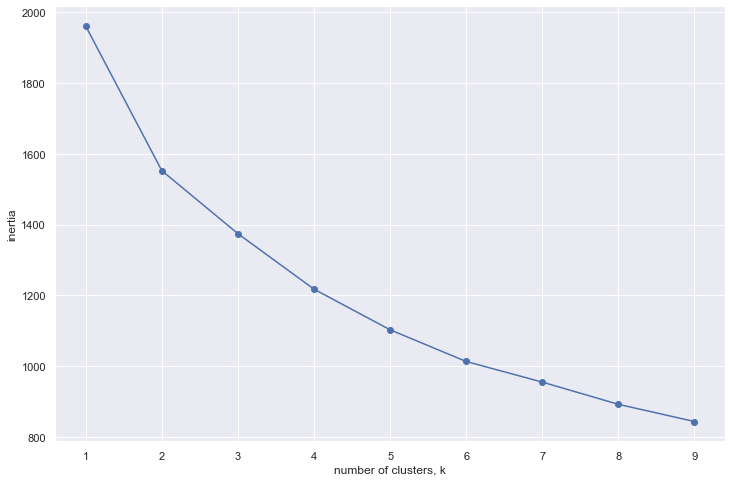

In [83]:
# Using inertia_plot function to visualise the number of possible clusters
inertia_plot(big_five_scaled,max_clust=10)

<br><h4>Chosing number of clusters</h4>
<br>

After few trials, we have decided to stay with 2 clusters because is dividing the data points in a best manner and it creates two, similar in size groups of observations, substantially different from each other (based on the value of the Big 5 factors). 
<br><br><br>

In [84]:
# Clustering

# INSTANTIATING a k-Means object with two clusters
k_means_big5 = KMeans(n_clusters=2,
                        random_state = 802)


# fitting the object to the data
k_means_big5_fit = k_means_big5.fit(big_five_scaled)

# converting the clusters to a DataFrame
k_means_big5_clusters = pd.DataFrame({'Kmeans':k_means_big5_fit.labels_})


# checking the results
k_means_big5_clusters.iloc[:,0].value_counts() # Both clusters are balanced and well differentiated

1    202
0    190
Name: Kmeans, dtype: int64

In [85]:
# storing cluster centers
centroids_big5 = k_means_big5_fit.cluster_centers_


# converting cluster centers into a DataFrame
centroids_big5_df = pd.DataFrame(centroids_big5)


# renaming principal componentswith Big5 factors
centroids_big5_df.columns = big_five_final.columns


# checking results (clusters = rows, Big5 personalities = columns)
centroids_big5_df

,extraversion,agreeableness,conscientiousness,emotional_stability,intellect
0,-0.600254,-0.619891,-0.409320,-0.376911,-0.228625
1,0.564596,0.583066,0.385004,0.354520,0.215044


In [93]:
# creating data frame with Big5 factors names
big_five_scaled_df = pd.DataFrame(big_five_scaled, 
                                  columns = ['extraversion',
                                             'agreeableness',
                                             'conscientiousness',
                                             'emotional_stability',
                                             'intellect'])

# creating dataframe for the created demographics
demographics_created = my_df[['age_range', 'Nationality2','Nationality_continent','customer_type']]

# creating Big5 merged dataframe with demographics
data_df = pd.concat([k_means_big5_clusters, demographics, demographics_created, big_five_scaled_df], axis = 1)

<br><h2>Demographics with Big5 analysis</h2>
<br>

This part consists of testing hypothesis about laptop buyers, in relation to their demographics and Big5 personalities traits.
Boxplots were used to visually represent different clusters, traits and demographic categories.
<br>

Hypotheses to be tested (as they were established at the beginning of this analysis):
- Mac users will have more opennes to new adventures 
- Mac users are more extroverted than windows users
- Windows users will be more conscientious than Mac users
<br><br><br>

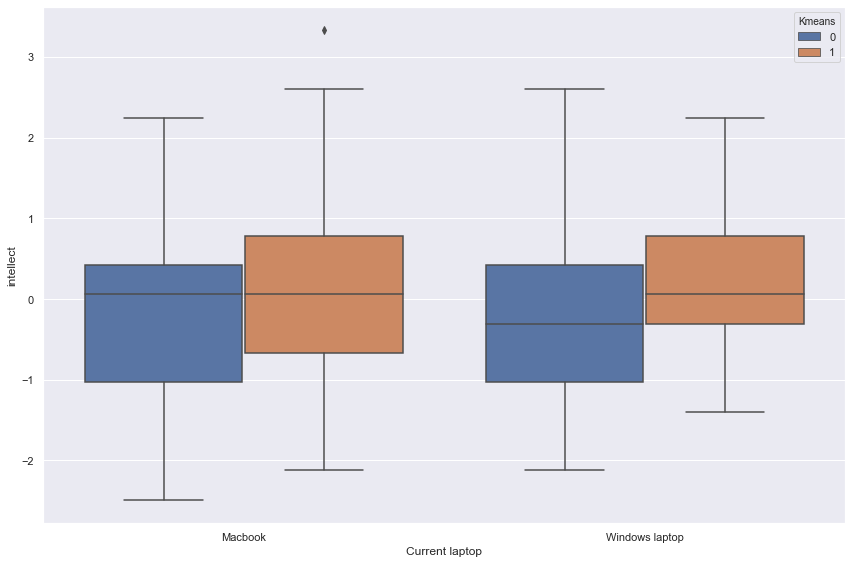

In [96]:
# H1: Mac users will have more opennes to new adventures

########################
# Current laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current laptop',
            y = 'intellect',
            hue = 'Kmeans',
            data = data_df )


plt.tight_layout()
plt.show()

# For the current laptops - the H1 is confirmed, especially in the cluster 0

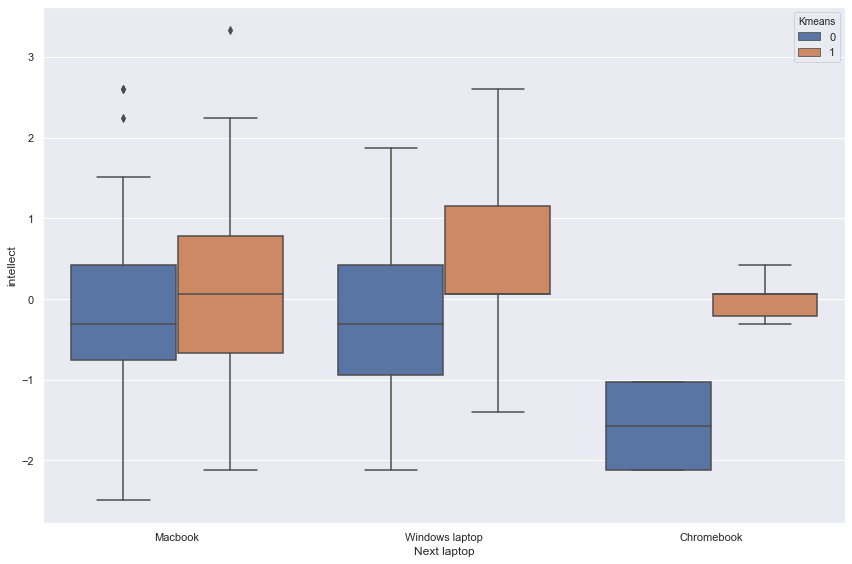

In [100]:
# H1: Mac users will have more opennes to new adventures

########################
# Next laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next laptop',
            y = 'intellect',
            hue = 'Kmeans',
            data = data_df )


plt.tight_layout()
plt.show()

# For the next laptops - the H1 is not confirmed

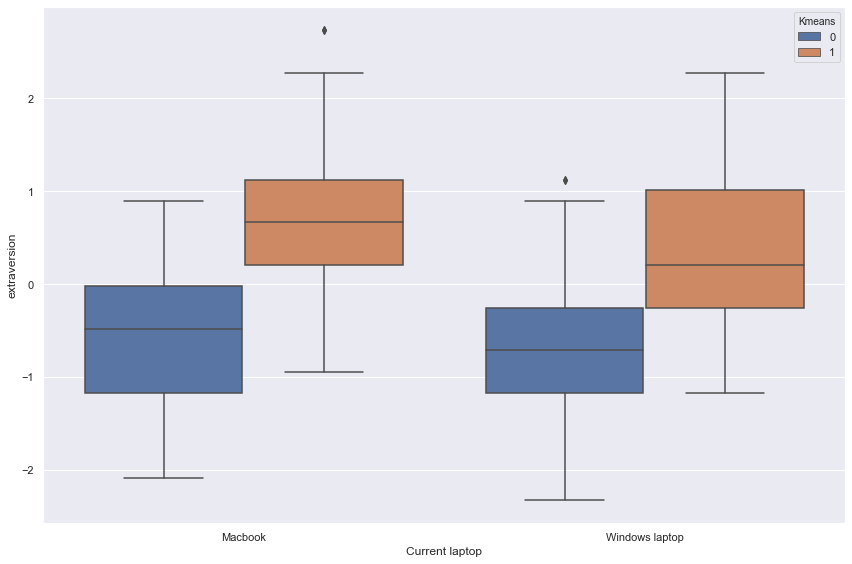

In [101]:
# H2: Mac users are more extroverted than windows users

########################
# Current laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current laptop',
            y = 'extraversion',
            hue = 'Kmeans',
            data = data_df )


plt.tight_layout()
plt.show()

# For the current laptops - the H2 is confirmed, in both clusters

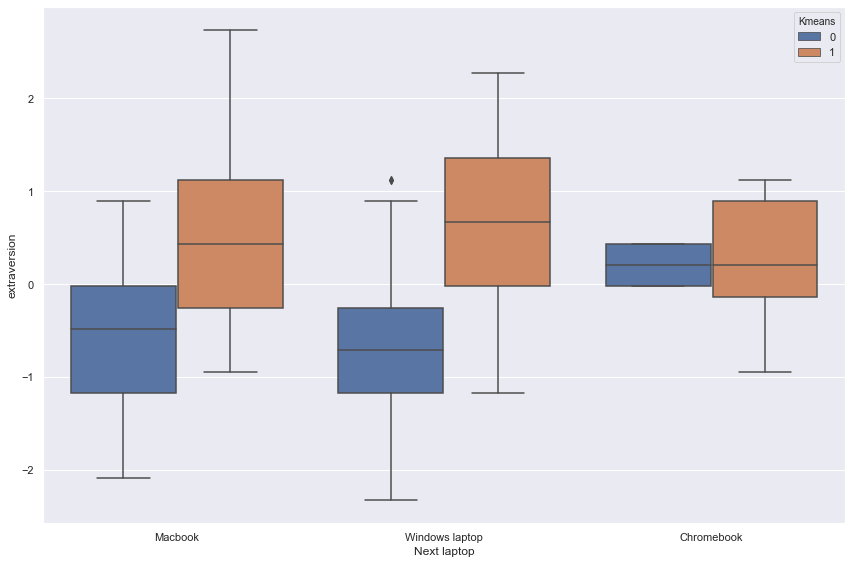

In [102]:
# H2: Mac users are more extroverted than windows users

########################
# Next laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next laptop',
            y = 'extraversion',
            hue = 'Kmeans',
            data = data_df )


plt.tight_layout()
plt.show()

# For the next laptops - the H2 is confirmed in the cluster 0, but not confirmed in the cluster 1
# what is interesting future Chrome users from cluster 0 are even more extrovertic than both future Mac and Windows users

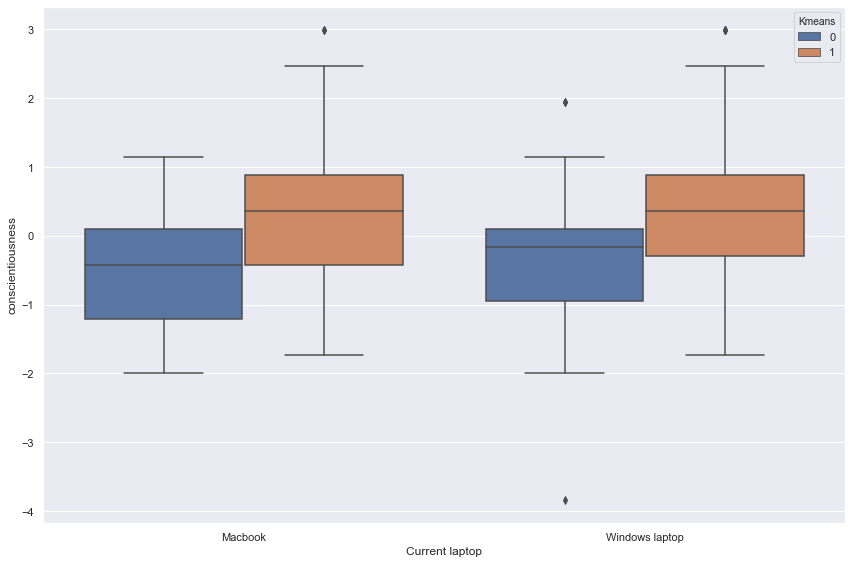

In [103]:
# H3: Windows users will be more conscientious than Mac users

########################
# Current laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current laptop',
            y = 'conscientiousness',
            hue = 'Kmeans',
            data = data_df )


plt.tight_layout()
plt.show()

# For the current laptops - the H3 is confirmed for cluster 0. In cluster 1, there is almost no difference.

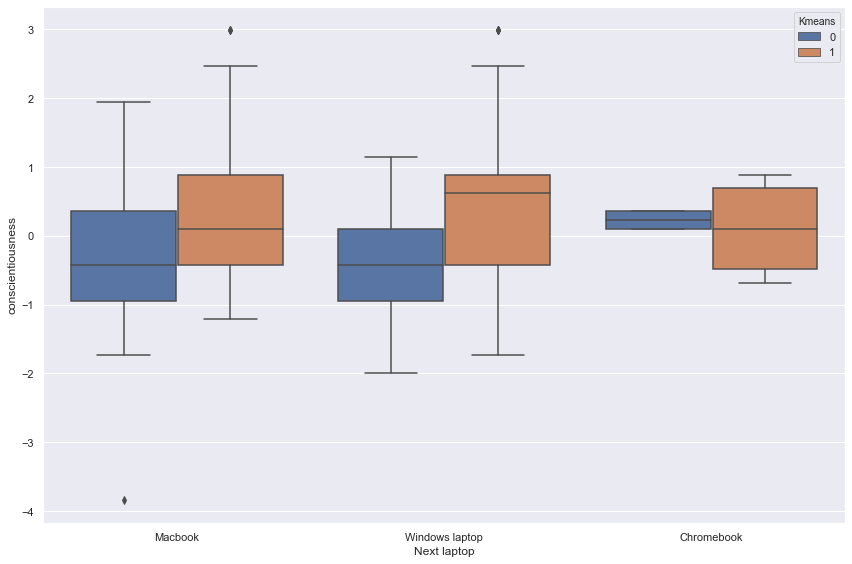

In [104]:
# H3: Windows users will be more conscientious than Mac users

########################
# Next laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next laptop',
            y = 'conscientiousness',
            hue = 'Kmeans',
            data = data_df )


plt.tight_layout()
plt.show()

# For the next laptops - the H3 is confirmed for cluster 1. In cluster 0, there is almost no difference.
# what is interesting future Chrome users from cluster 0 are even more conscientious than both future Mac and Windows users

<br><h2>Hult DNA analysis</h2>
<br>

This part consists of testing hypothesis about laptop buyers, in relation to their demographics and Hult DNA
<br>

In [14]:
hult_dna.head()

,DNA_Q1__dont__generate_ideas_that_are_new_and_different,DNA_Q2__demonstrate_an_awareness_of_personal_strengths_and_limitations,DNA_Q3__display_a_growth_mindset,DNA_Q4__respond_effectively_to_multiple_priorities,"DNA_Q5__take_initiative_even_when_circumstances,_objectives,_or_rules_arent_clear",DNA_Q6__encourage_direct_and_open_discussions,DNA_Q7__respond_effectively_to_multiple_priorities.1,"DNA_Q8__take_initiative_even_when_circumstances,_objectives,_or_rules_arent_clear.1",DNA_Q9__encourage_direct_and_open_discussions.1,DNA_Q10__listen_carefully_to_others,DNA_Q11__dont_persuasively_sell_a_vision_or_idea,DNA_Q12__build_cooperative_relationships,DNA_Q13__work_well_with_people_from_diverse_cultural_backgrounds,"DNA_Q14__effectively_negotiate_interests,_resources,_and_roles",DNA_Q15__cant_rally_people_on_the_team_around_a_common_goal,DNA_Q16__translate_ideas_into_plans_that_are_organized_and_realistic,DNA_Q17__resolve_conflicts_constructively,DNA_Q18__seek_and_use_feedback_from_teammates,DNA_Q19__coach_teammates_for_performance_and_growth,DNA_Q20__drive_for_results
0,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4
1,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5
2,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5
3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5
4,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3


In [25]:
hult_dna.columns = ['DNA_1', 'DNA_2', 'DNA_3', 'DNA_4', 'DNA_5', 'DNA_6', 'DNA_7',
              'DNA_8', 'DNA_9', 'DNA_10', 'DNA_11', 'DNA_12', 'DNA_13', 
              'DNA_14', 'DNA_15', 'DNA_16', 'DNA_17', 'DNA_18', 'DNA_19', 
              'DNA_20', 'DNA_21']

<h2> Needs sub heading </h2>

Most of the questions are asked in a direct manner and use a positive connotation e.g. "Are you satisfied"
and so from the scale 1 to 5, the higher the more satisfied.

However, if the question is twisted into "Are you not satisfied?" which uses a negative connotation, then from scale 1 to 5, the lower the more satisfied.

In the dataset, only DNA_2, DNA_12 and DNA_16 are asked in a negative connotation.
In order to standardize the question, we switch answers of 5 to 1, 4 to 2, 3 stays at 3,
2 to 4, 1 to 5 so the value is at the same direction of the scale as other Hult DNA questions.

<strong> Step 1: </strong> Create an empty list

<strong> Step 2: </strong> Using for loop to loop over the original column

<strong> Step 3 :</strong> Feed the new value to the blank list

<strong> Step 4:</strong>  Feed the new column with the list which is no longer the blank list 
since Step 3, the blank list has the new value

<strong> DNA_2, DNA_12 and DNA_16 </strong> will undergo the Step1 to Step4, 
the new columns <strong> DNA_2n, DNA_12n and DNA_16n will be created </strong>

In [27]:
########################################
# Standardize the columns for negative question 
########################################

change = ['DNA_2', 'DNA_12', 'DNA_16']

for column in change:

    placeholder_lst = []

    for value in hult_dna[column]:

        if value == 1:
            value = 5

        elif value == 2:
            value = 4

        elif value == 3:
            value = 3

        elif value == 4:
            value = 2

        elif value == 5:
            value = 1

        placeholder_lst.append(value)

    hult_dna[column+'n'] = placeholder_lst


<h2> Hult DNA Groups </h2>

The following section groups questions by the leadership skills model of the Hult DNA available at available on <a href = "https://www.hult.edu/blog/why-every-leader-needs-growth-mindset/">Hult's website</a>
    
 Essentially questions were grouped into the following 3 attributes:
 
 1) Thinking
 
 2) Communication
 
 3) Teamwork
 
For all the questions in each attribute, the average was taken to determine each respondents overall tendency toward each attribute
 
 
An additional column for 'Growth mindset' was also created

In [28]:
########################################
# Group
########################################

# Growth/Fixed mindset, ['DNA_4']
hult_dna['Growth mindset'] = hult_dna['DNA_4']


# Positive thinking, ['DNA_3']['DNA_19'],['DNA_5']=['DNA_8']
# ['need_improve_thiking'],['positive_thinking']
hult_dna['thinking'] = hult_dna[['DNA_3', 'DNA_19','DNA_5','DNA_8']].mean(axis=1)

########################################
# Communicator/ Need_improve_communication, ['DNA_11'],['DNA_6']=['DNA_9']
# ['DNA_2n'], ['DNA_12n'],['DNA_17']
hult_dna['communication'] = hult_dna[['DNA_11', 'DNA_6','DNA_9','DNA_2n','DNA_12n','DNA_17']].mean(axis=1)

########################################
# Team player/ Independent, ['DNA_13'],['DNA_14'], ['DNA_16n'], 
# ['DNA_7']=['DNA_10'], ['DNA_19'],['DNA_20'],['DNA_21'],
# ['DNA_1'],['DNA_15'],['DNA_18']

hult_dna['teamwork'] = hult_dna[['DNA_13', 'DNA_14','DNA_16n','DNA_7','DNA_10','DNA_19',
                      'DNA_20','DNA_21','DNA_1','DNA_15','DNA_18']].mean(axis=1)

<br><h2> Hult DNA modeling </h2>

<br>
This part includes:

- Scaling data

- Principal Component Analysis (PCA)

- Using Hult DNA as main components for modeling
<br>


<h3> Scaling data </h3>

To avoid biases in the results we make sure to only select our Hult DNA explanatory variables before we do any scaling. Later, the removed data can be added back and used to compare results.


The next steps are then to 

* instantiate a StandardScaler() object
* fit the scaler object Hult DNA variables
* transform Hult DNA variables using the scaler object

In [29]:
# dropping demographic information
my_df_DNA = hult_dna.loc[:, ['Growth mindset','thinking','communication','teamwork' ]]

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(my_df_DNA)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(my_df_DNA)


# converting scaled data into a DataFrame
DNA_scaled = pd.DataFrame(X_scaled)


# reattaching column names
DNA_scaled.columns = my_df_DNA.columns


# checking pre- and post-scaling variance
print(pd.np.var(my_df_DNA), '\n\n')
print(pd.np.var(DNA_scaled))
                             

Growth mindset    0.596939
thinking          0.341757
communication     0.274067
teamwork          0.231253
dtype: float64 


Growth mindset    1.0
thinking          1.0
communication     1.0
teamwork          1.0
dtype: float64


/Users/Piya/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Piya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


<h3> PCA </h3>

<strong> The next step </strong> was to instantiate, fit, and transform a PCA model with no fixed number of components

<strong>Then </strong> we can visualize the explained variance of each principal component using a ScreePlot.


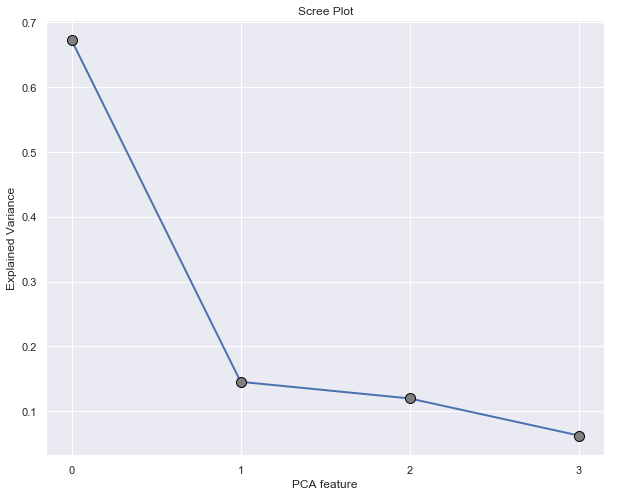

In [30]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 802)


# FITTING and TRANSFORMING the DNA_scaled
DNA_pca = pca.fit_transform(DNA_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

Note: From the ScreePlot we determined that there is a drop in the marginal return of explained variance after <strong> 2 principial components </strong>

In [31]:
# INSTANTIATING a new model using the first three principal components
pca_2 = PCA(n_components = 2,
                random_state = 802)


# FITTING and TRANSFORMING the purchases_scaled
DNA_pca_2 = pca_2.fit_transform(DNA_scaled)

Each principal component can be measured indirectly by analyzing its factor loadings, We can then develop a persona for each principal component

In [32]:
####################
### Max PCA Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(DNA_scaled.columns)


##################
### 2 PCA Model ###
##################
# transposing pca components (pc = 2)
factor_loadings_2 = pd.DataFrame(pd.np.transpose(pca_2.components_))


# naming rows as original features
factor_loadings_2 = factor_loadings_2.set_index(DNA_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


2 Components Factor Loadings
------------------------------
{factor_loadings_2.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                   0     1     2     3
Growth mindset -0.45 -0.89  0.11  0.01
thinking       -0.51  0.16 -0.68 -0.50
communication  -0.49  0.33  0.72 -0.36
teamwork       -0.54  0.27 -0.11  0.79


2 Components Factor Loadings
------------------------------
                   0     1
Growth mindset -0.45 -0.89
thinking       -0.51  0.16
communication  -0.49  0.33
teamwork       -0.54  0.27



From our  2 Components Factor Loadings we see a neutral relationship between the 0th component and Hult DNA, this principal component was renamed <strong> "All_rounded"</strong>

From our 2 Components Factor Loadings we see a strong negative relationship between the 1st component and Growth mindset of Hult DNA, this principal component was renamed <strong> "Fixed_mindset" </strong>

In [33]:
# Defining Components
# 0	All_rounded
# 1	Fixed_mindset

# naming each principal component
factor_loadings_2.columns = ['All_rounded',
                             'Fixed_mindset']

# checking the result
factor_loadings_2

,All_rounded,Fixed_mindset
Growth mindset,-0.446245,-0.887865
thinking,-0.510625,0.164284
communication,-0.493807,0.333042
teamwork,-0.544318,0.271641


In [35]:
# analyzing factor strengths per person
X_pca_reduced = pca_2.transform(DNA_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
DNA_pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
DNA_pca_scaled.columns = ['All_rounded',
                             'Fixed_mindset']


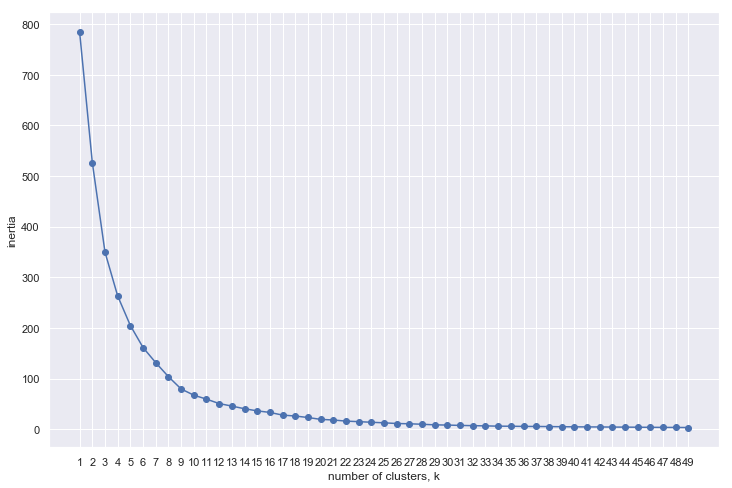

In [40]:
# calling the inertia_plot() function
inertia_plot(data = DNA_pca_scaled)

<br><h3>Chosing number of clusters</h3>
<br>

After few trials, we have decided to stay with 3 clusters because it is the amount of cluster that is possible and not too difficult to focus for the business. If we select more clusters, it will be too hard to organize between each cluster and might has a high cost.
<br><br><br>

In [41]:
# INSTANTIATING a k-Means object with three clusters
kmeans_DNA = KMeans(n_clusters = 3,
                         random_state = 802)


# fitting the object to the data
kmeans_DNA.fit(DNA_pca_scaled)


# converting the clusters to a DataFrame
DNA_kmeans_pca = pd.DataFrame({'Cluster': kmeans_DNA.labels_})


# checking the results
print(DNA_kmeans_pca.iloc[: , 0].value_counts())

0    153
2    126
1    113
Name: Cluster, dtype: int64


Next, we classified data into clusters and see which clusters belong to which components from PCA

In [43]:
# 0	All_rounded
# 1	Fixed_mindset


# storing cluster centers
centroids_DNA = kmeans_DNA.cluster_centers_


# converting cluster centers into a DataFrame
centroids_DNA_df = pd.DataFrame(centroids_DNA)


# renaming principal components
centroids_DNA_df.columns = ['All_rounded',
                            'Fixed_mindset']


# checking results (clusters = rows, pc = columns)
centroids_DNA_df.round(2)

,All_rounded,Fixed_mindset
0,0.05,0.86
1,-1.10,-0.44
2,0.93,-0.65


From the table above, we can see the difference between each clusters
- Cluster 0: people in this cluster are fixed mindset type
- Cluster 1: people in this cluster are mixed between all rounded and fixed mindset
- Cluster 2: people in this cluster are All rounded type

Next, we change the cluster name and combine the output from the model with demographic data.

In [45]:
# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([my_df.loc[ : , ['Current laptop', 'Next laptop',
                                                'Program', 'Gender', 'age_range',
                                                'Nationality2','Nationality_continent',
                                                'customer_type']],
                                DNA_kmeans_pca, DNA_pca_scaled],
                                axis = 1)


# renaming clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3'
                }


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df

data_df.head()

,Current laptop,Next laptop,Program,Gender,age_range,Nationality2,Nationality_continent,customer_type,Cluster,All_rounded,Fixed_mindset
0,Macbook,Macbook,DD (MIB & Business Analytics),Female,20-25,ecuadorian,South American,Loyal Macbook,Cluster 1,-0.001453,0.289545
1,Windows laptop,Windows laptop,One year Business Analytics,Male,26-30,ecuadorian,South American,Loyal Windows,Cluster 1,-0.414607,0.841199
2,Windows laptop,Windows laptop,One year Business Analytics,Male,20-25,indian,Asian,Loyal Windows,Cluster 1,0.907266,0.953040
3,Windows laptop,Windows laptop,One year Business Analytics,Female,26-30,indian,Asian,Loyal Windows,Cluster 2,-0.675158,-0.922940
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),Male,26-30,chinese,Asian,Not Brand Loyal,Cluster 3,1.724129,0.243651


<br><h2>Demographics with Hult DNA analysis</h2>
<br>

This part consists of testing hypothesis about laptop buyers, in relation to their demographics and Hult DNA personalities traits.
Boxplots were used to visually represent different clusters, traits and demographic categories.
<br>

<br>

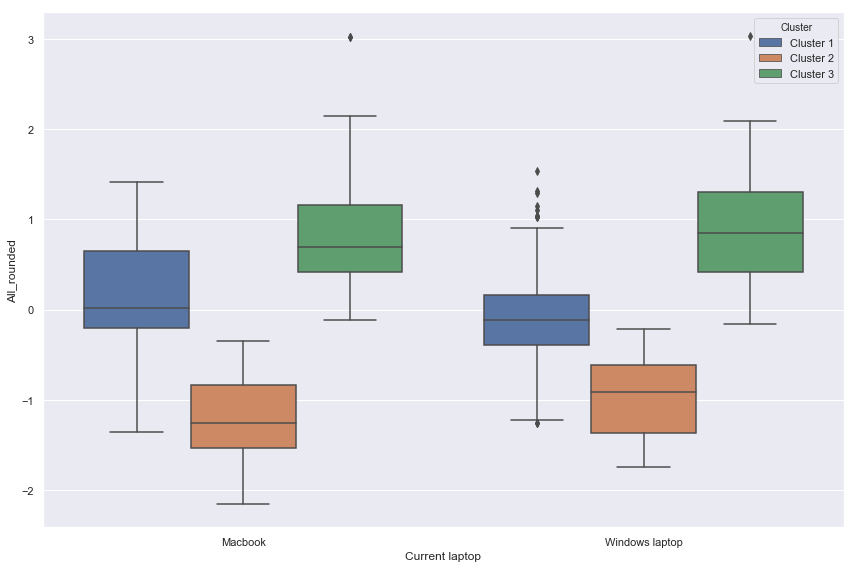

In [47]:
########################
# Current laptop
########################

# All_rounded
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current laptop',
            y = 'All_rounded',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

Current Window users demonstrate slightly more all_rounded personality compare 
based on <strong> Cluster2 and <strong> Cluster3.

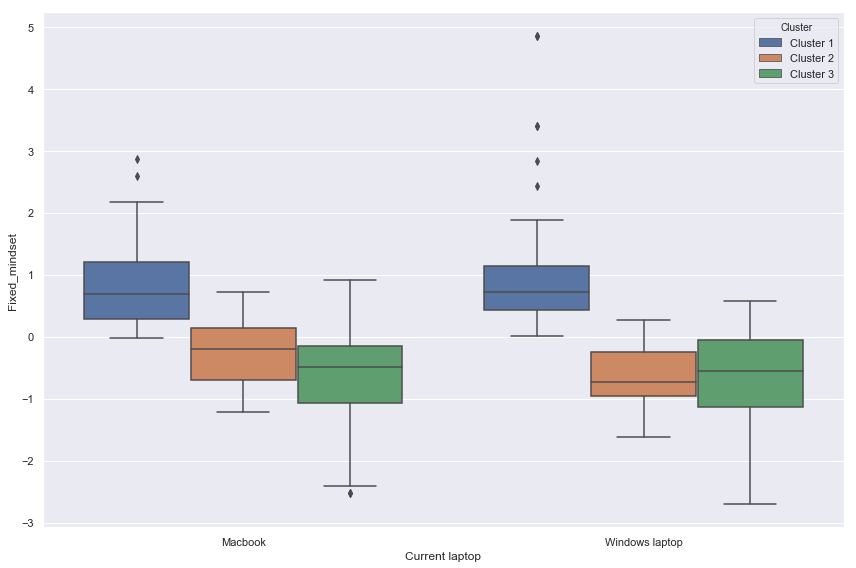

In [48]:
########################
# Current laptop
########################

# Fixed_mindset
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current laptop',
            y = 'Fixed_mindset',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

The window users showcase more growth mindset in terms of embracing changes than Mac users.
The reason being that window users have more brands as options.

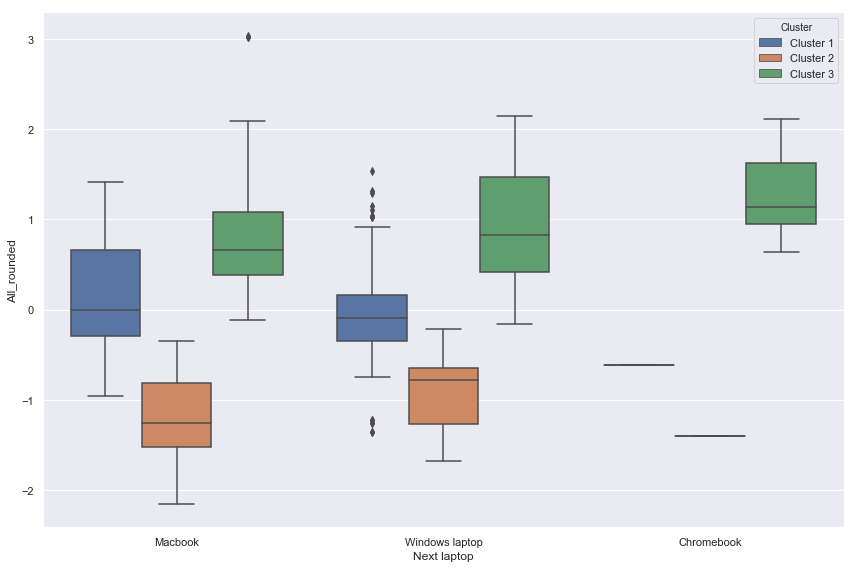

In [49]:
########################
# Next laptop
########################

# All_rounded
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next laptop',
            y = 'All_rounded',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

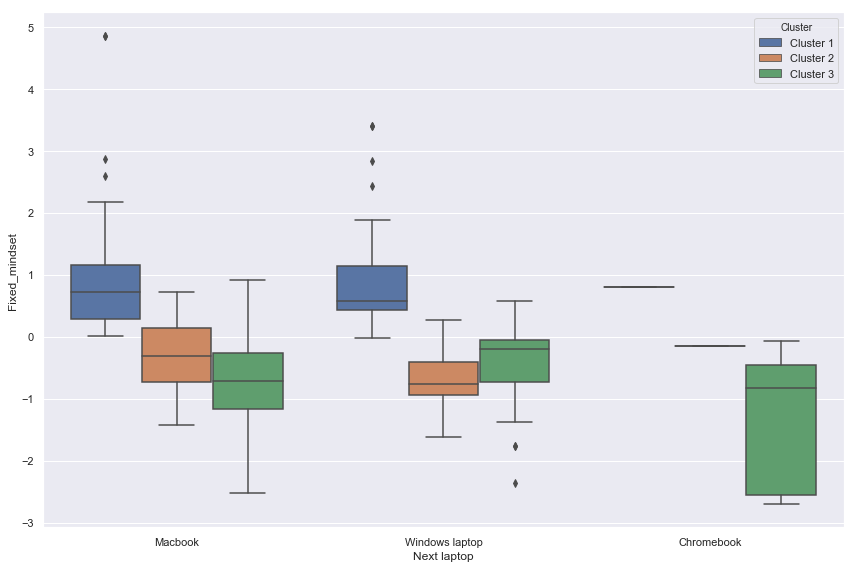

In [50]:
########################
# Next laptop
########################

# Fixed_mindset
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next laptop',
            y = 'Fixed_mindset',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

Female demonstrate more all_rounded personality since female are tends to be 
more multi-tasks than male

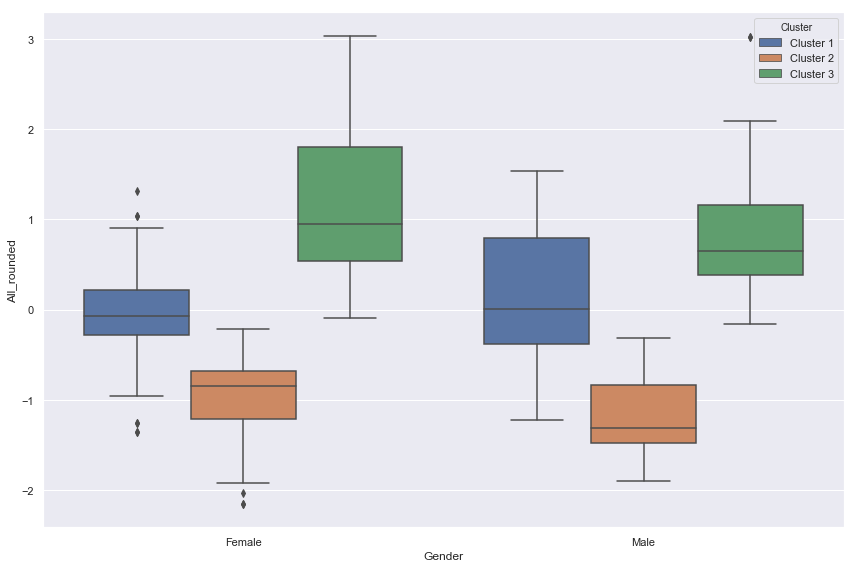

In [51]:
########################
# Gender
########################

# All_rounded
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'All_rounded',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

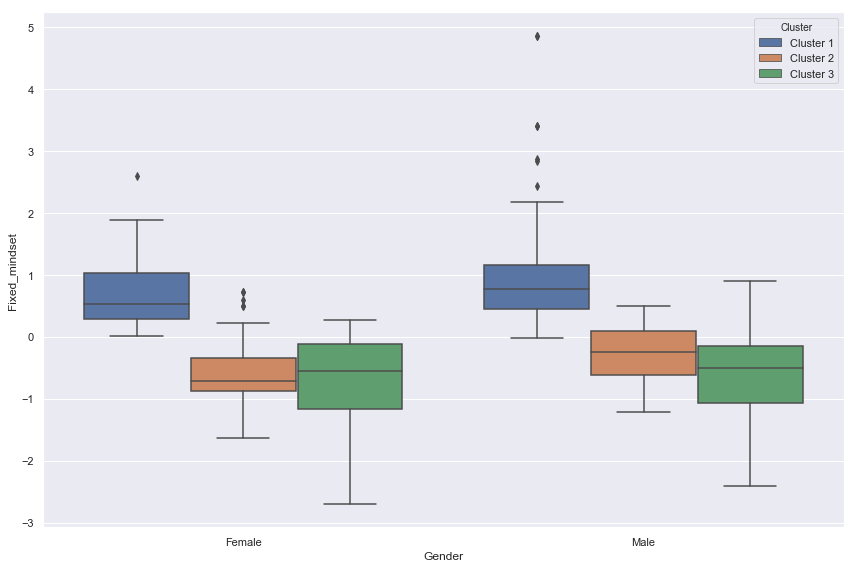

In [52]:
########################
# Gender
########################

# Fixed_mindset
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Fixed_mindset',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

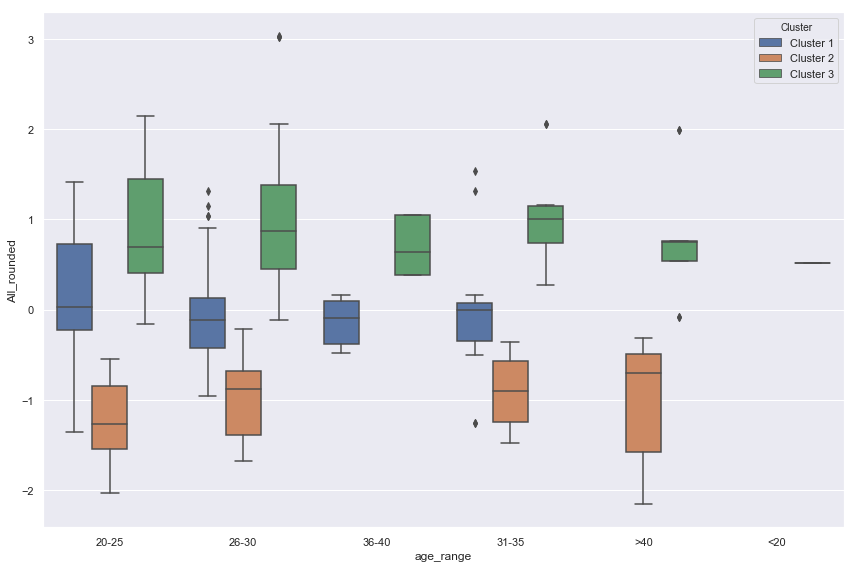

In [53]:
########################
# Age
########################

# All_rounded
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_range',
            y = 'All_rounded',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

Based on the data collection from the university, the ages are most likely located between
20 to 35. 
On average, the age between 26-30 showcases more all_rounded personality with the knowledge 
as well as the professional, life experience. 

This is further address that window users are more toward all-rounded personality,
which Microsoft can have the target segment on age 26-30 with all-rounded
personality.

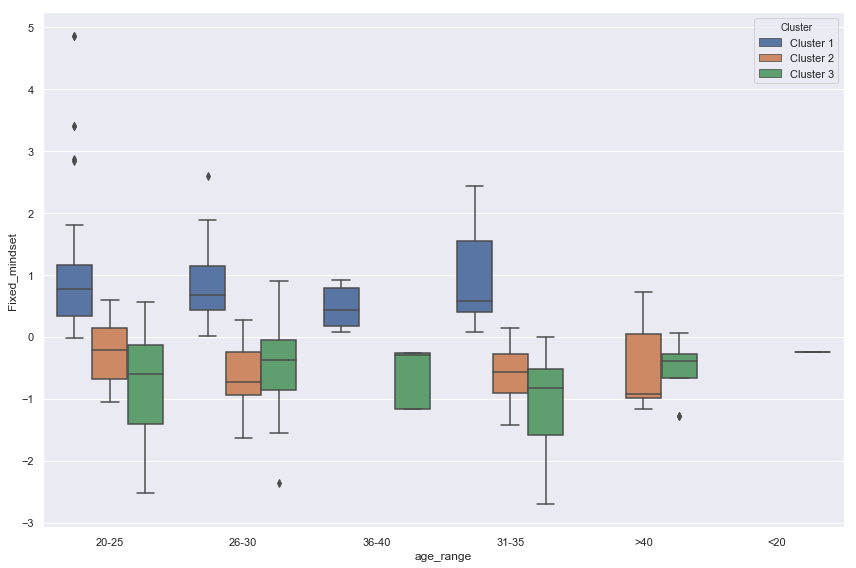

In [54]:
########################
# Age
########################

# Fixed_mindset
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_range',
            y = 'Fixed_mindset',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

The younger age demonstrate more fixed mindset 
since people are still perceiving the world with their own personality, 
which is less flexible to embrace the change and influenced more by the peers.